In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
np.random.seed(0)
m=100
x=np.linspace(0,10,m).reshape(m,1)
y=x + np.random.randn(m,1)

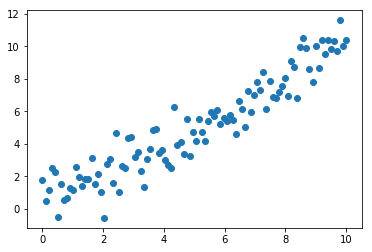

In [56]:
plt.scatter(x,y)

# creation du model de regression lineaire vue que la dataset est lineaire

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
model.score(x,y)


0.8881140743377214

In [58]:
y_prim=model.predict(x)

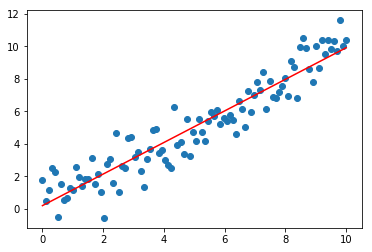

In [59]:
plt.scatter(x,y)
plt.plot(x,y_prim, c='r')

# dataset non lineaire

In [60]:
np.random.seed(0)
m=100
x=np.linspace(0,10,m).reshape(m,1)
y=x**2 + np.random.randn(m,1)


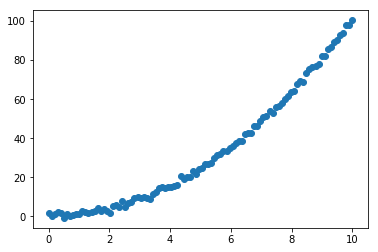

In [61]:
plt.scatter(x,y)

Un model lineaire ne marcera pas là dessus beaucoup de valeur serons exterieurs

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.928782407186839

In [63]:
y_prim=model.predict(x)

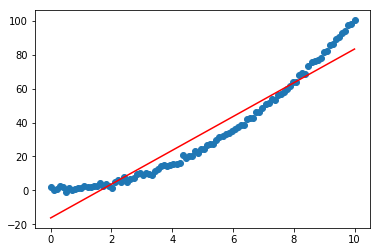

In [64]:
plt.scatter(x,y)
plt.plot(x,y_prim, c='r')

Au lieu de ça on fait avec un svm:

In [65]:
from sklearn.svm import SVR
model = SVR(C=100)
model.fit(x,y)
model.score(x,y)

C:\Users\EMMANUEL MBANGI LUKU\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9990886356801586

In [66]:
y_prim=model.predict(x)

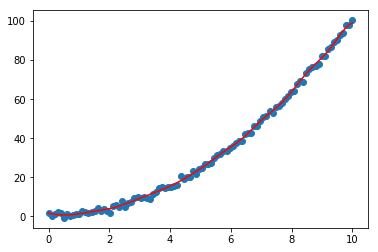

In [67]:
plt.scatter(x,y)
plt.plot(x,y_prim, c='r')

# Creation d'un model de classification (titanic)

In [68]:
import pandas as pd

In [69]:
df=pd.read_excel('titanic_DataSet.xlsx')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.isnull().sum() #compter le nombre des valeur nulle pour chaque variable

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [71]:
#suppression de valeur nulles dans la dataset
df.dropna(inplace=True)

In [72]:
Mdf= df.drop(['PassengerId','Name', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
Mdf['Sex'].replace(['male','female'],[0,1], inplace=True)
Mdf.head()

,Survived,Pclass,Sex,Age
1,1,1,1,38.0
3,1,1,1,35.0
6,0,1,0,54.0
10,1,3,1,4.0
11,1,1,1,58.0


# creation du model KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [74]:
_y=Mdf['Survived']
_x=Mdf.drop('Survived',axis=1)


In [75]:
model.fit(_x,_y) #entrainement
model.score(_x,_y) #precision du model

0.8481481481481481

In [81]:
p=model.predict(_x)  #exploitation du model fini

In [92]:
def predire(model,Pclasse,sexe,age):
    X=np.array([Pclasse,sexe,age]).reshape(1,3)
    print(model.predict(X))
    print("vos chance d'appartenir à chacune de classe (non survis ou survis )")
    print(model.predict_proba(X))

In [93]:
predire(model,2,0,5) #une personne en 1ere classe de sexe masculin avec 5ans comme age aurai survecu

[1]
vos chance d'appartenir à chacune de classe (non survis ou survis )
[[0.2 0.8]]


# SELECTION DU MODEL (voir malaria model)

# LEARNING CURVE (voir malaria model)